# ***The Spark Foundation***
# ***GRIP TASK 1- Prediction using Supervised ML*** 

Dataset used- http://bit.ly/w-data


In [17]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")


Data imported successfully


In [3]:
s_data.head(5)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
s_data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


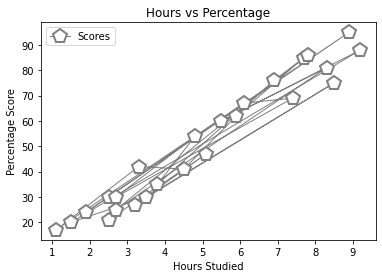

In [5]:
s_data.plot(x='Hours', y='Scores', style='-p', color='gray',
         markersize=15, linewidth=1,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [6]:
#spliting them into input (independent) variables and output (dependent) variable
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

In [7]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training completed")

Training completed


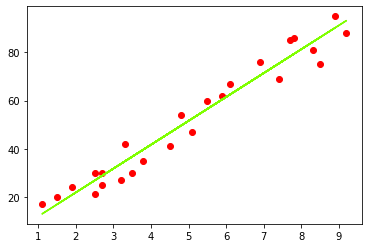

In [9]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting of testing line
plt.scatter(X, y, color='red')
plt.plot(X, line, color='chartreuse')
plt.show()

In [10]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
df.describe()

,Actual,Predicted
count,5.000000,5.000000
mean,41.600000,42.651852
std,22.255336,24.407192
min,20.000000,16.884145
25%,27.000000,26.794801
50%,30.000000,33.732261
75%,62.000000,60.491033
max,69.000000,75.357018


In [15]:
df.corr()

,Actual,Predicted
Actual,1.000000,0.980684
Predicted,0.980684,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


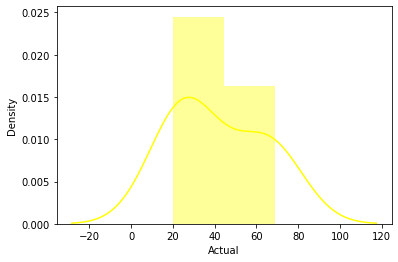

In [18]:
sns.distplot(df['Actual'],color='yellow')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


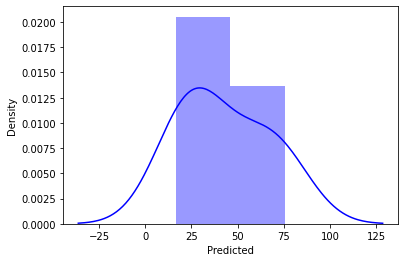

In [19]:
sns.distplot(df['Predicted'],color='blue')

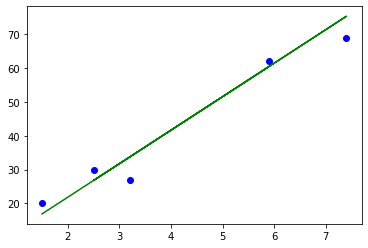

In [12]:
#Comparing actual vs predicted values through plots
plt.scatter(X_test, y_test, color = "blue")
plt.plot(X_test, y_pred, color = "green")

In [21]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [13]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [23]:
from sklearn.metrics import r2_score
accuracy=  r2_score(y_test,y_pred)

In [25]:
print("Accuracy achieved is ",accuracy*100,"%")

Accuracy achieved is  94.54906892105353 %


Thankyou